## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt


from matplotlib import *
import sys
import pylab as pl
from pylab import *

In [2]:
df = pd.read_excel('radialData.xlsx', sheet_name='data_missingvalues')

In [3]:
df.head()

,Times,Procedure
0,00:00:16,G
1,00:00:17,A
2,00:00:23,D
3,00:00:27,B
4,00:00:34,I


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 2 columns):
Times        7627 non-null object
Procedure    7627 non-null object
dtypes: object(2)
memory usage: 119.3+ KB


In [5]:
#set type of time column to datetime; set type of procedure column to string
df['Times'] = df['Times'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%H:%M:%S'))
df['Procedure'] = df['Procedure'].apply(lambda x: str(x))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 2 columns):
Times        7627 non-null datetime64[ns]
Procedure    7627 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 119.3+ KB


In [7]:
#extract hour from time column
df['Hour'] = df['Times'].dt.hour

In [8]:
df.head(2)

,Times,Procedure,Hour
0,1900-01-01 00:00:16,G,0
1,1900-01-01 00:00:17,A,0


## Create Padding for "No Record" Values, Append to data

In [9]:
hour_list = [x*1 for x in range(0, 23+1)]

pad_height = 24
pad_width = len(df.columns) 
df_0 = pd.DataFrame(np.nan, index=range(pad_height), columns=range(pad_width))
df_0.columns=df.columns.values
df_0['Hour'] = hour_list

In [10]:
df = df.append(df_0)

## Radial Bar Chart Plot

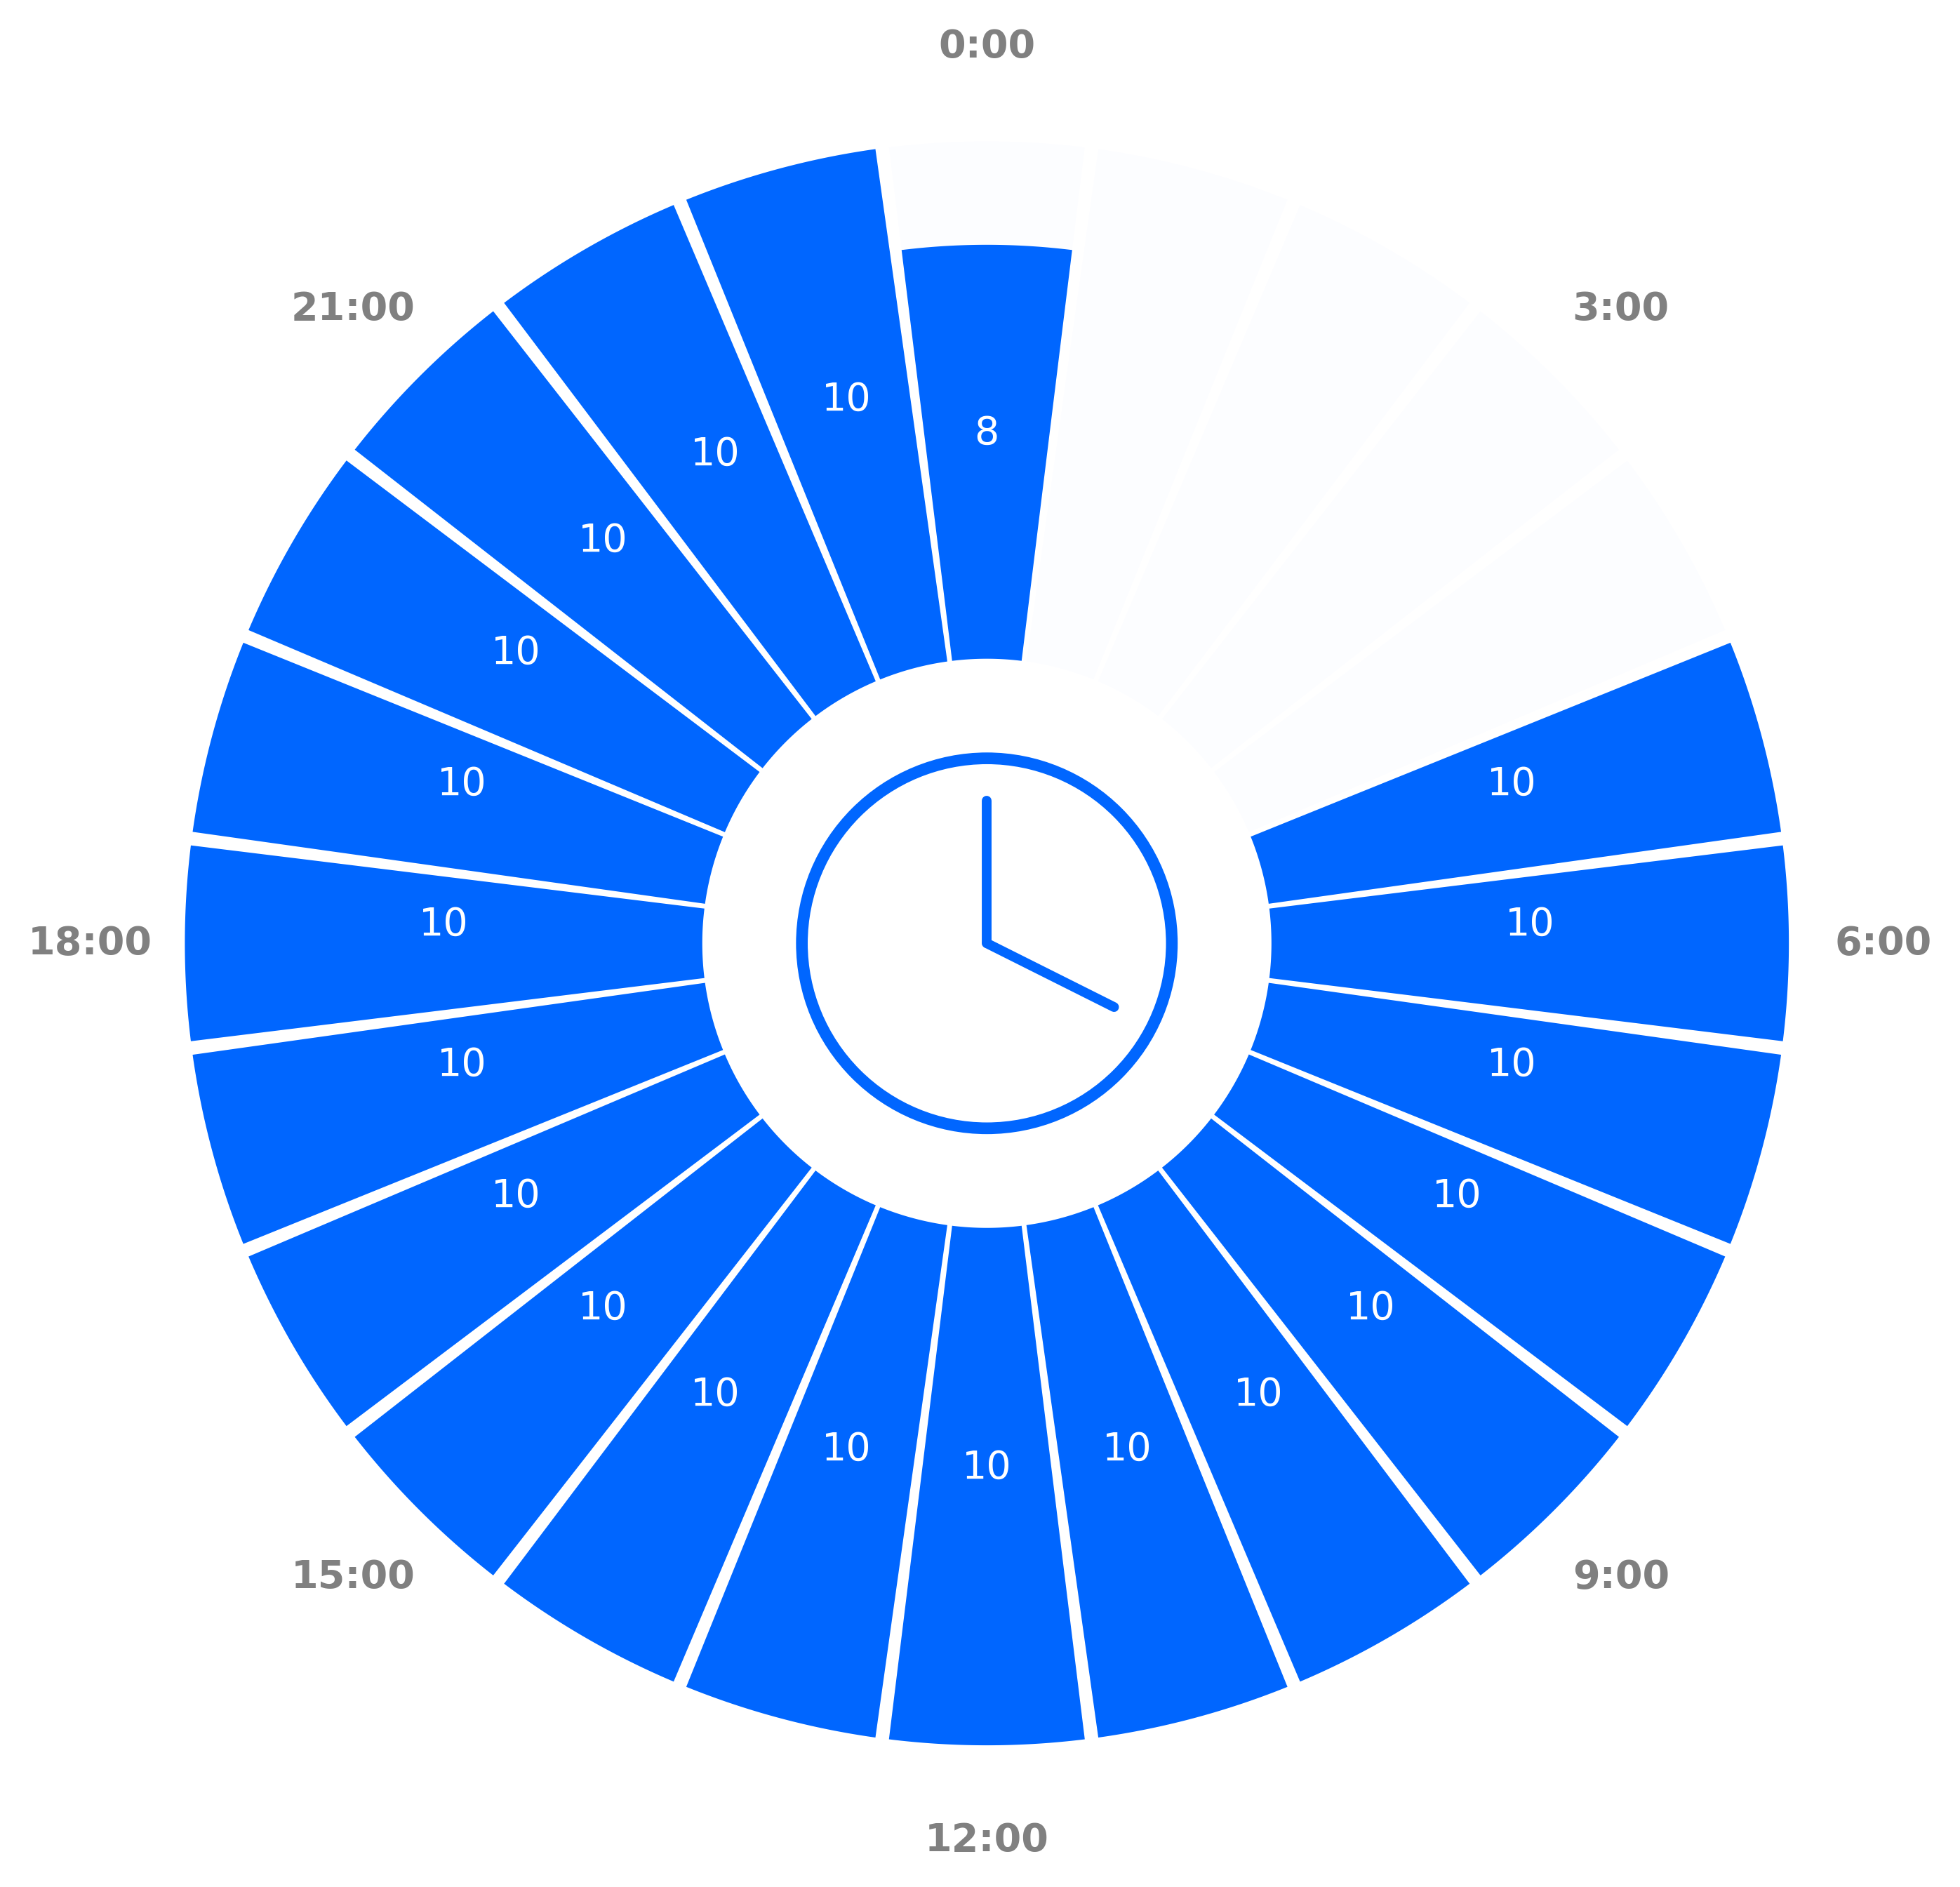

In [21]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours), which is accounted for with padding
procCounts = df.groupby('Hour')['Procedure'].nunique() #height of bars is the number of procedures started in that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 0.55*max(procCounts) # size of the inner circle


fig = plt.figure(figsize=(8,8), dpi=400, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars1 = ax.bar(theta, max(procCounts), width=width, bottom=bottom, color="#0066ff", alpha=0.01) #set background wedge color

rotations = [np.degrees(i) for i in theta]
for i in rotations: i = int(i)
for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    if bar.get_height() > 1:
         height = bottom+(bar.get_height()/2)
         ax.text(x, height, label, ha='center', va='bottom', color='white', fontweight='normal')

#for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
#    lab = ax.text(x,bottom+bar.get_height() , label, 
#             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])


## write 0,3,6,9,12,15,18,21:00 around the circle
ticks = [f"{i}:00" for i in range(0, 24, 3)]
ax.set_xticklabels(ticks, color='grey', fontweight='bold')

## Draw a "clock" icon inside of the graph
##lines for hands of a clock
x1, y1 = [0, 90], [0, 0.5*bottom]
x2, y2 = [0,0], [0, 0.5*bottom]
plt.plot(x1, y1, x2, y2, linewidth=2.5, solid_capstyle='round', color='#0066ff', alpha=1)

##circle for clockface
circle = pl.Circle((0, 0), 0.65*bottom, transform=ax.transData._b, linewidth=3, fill=False, color="#0066ff", alpha=1)
ax.add_artist(circle)
##

plt.axis('on')

plt.savefig('radialBarPlot.png')

In [26]:
clockNumbers = [f"{i:02d}" for i in range(0, 24, 6)]

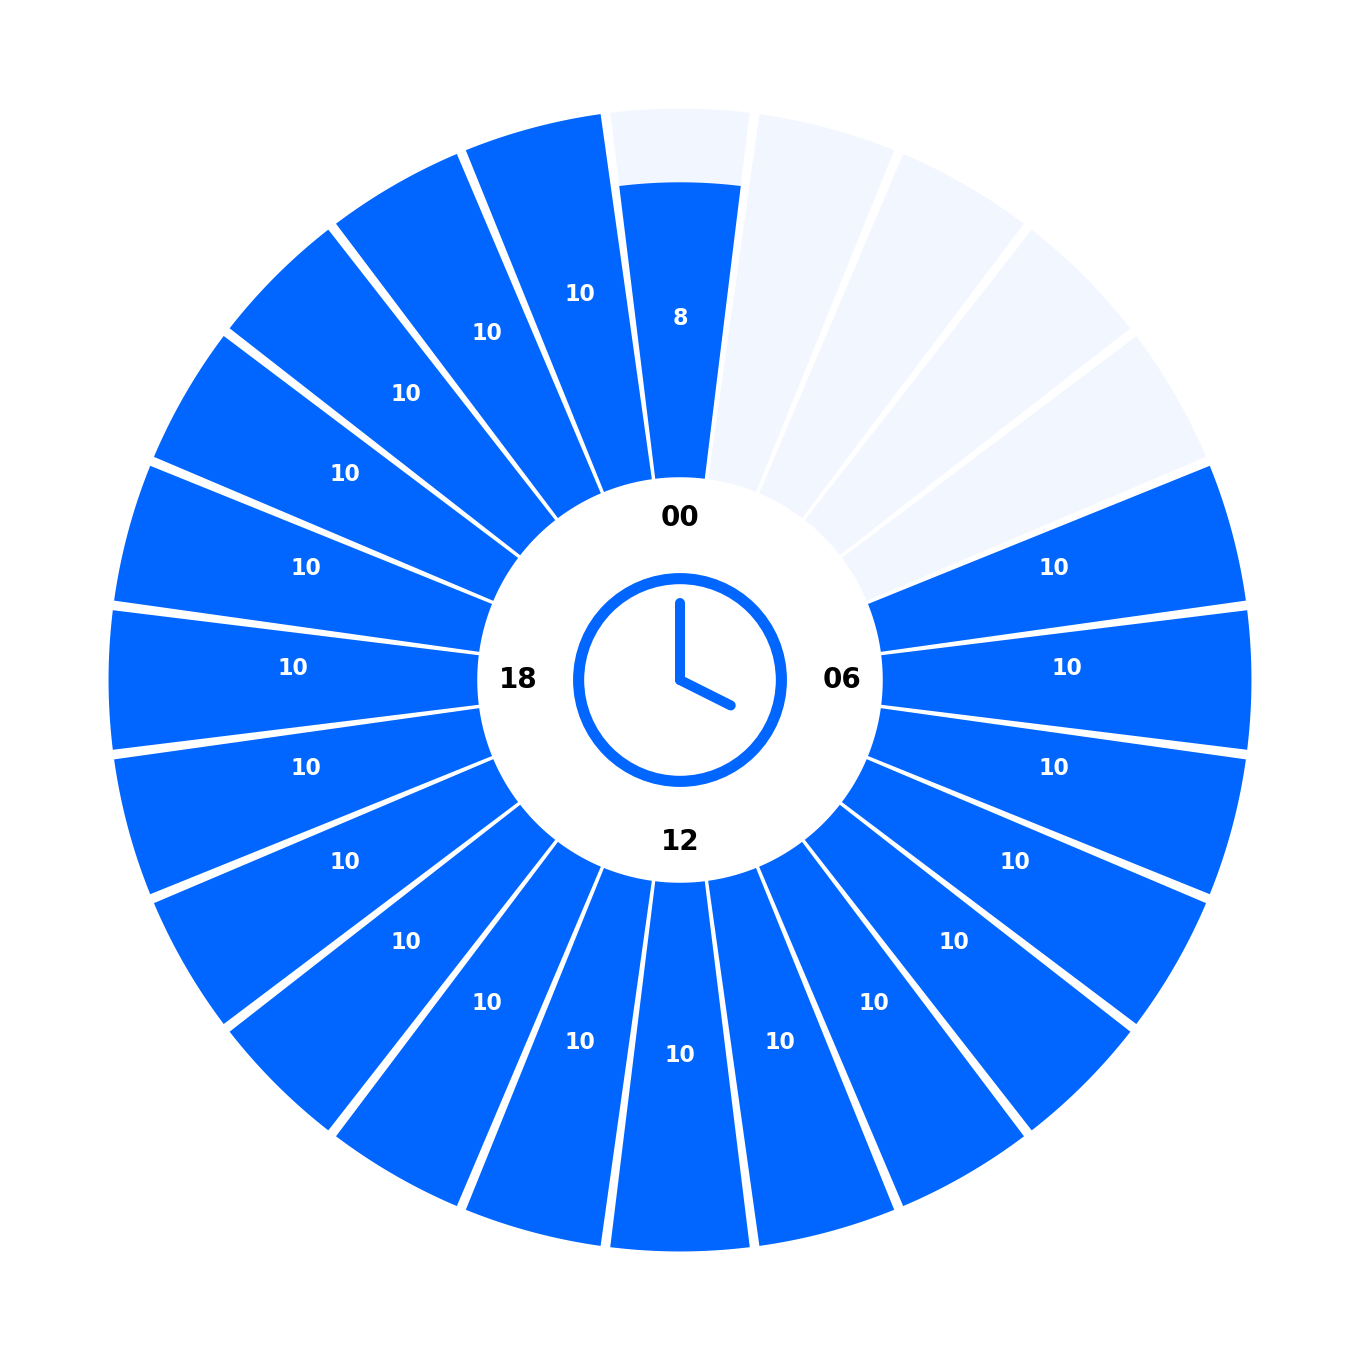

In [139]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours), which is accounted for with padding
procCounts = df.groupby('Hour')['Procedure'].nunique() #height of bars is the number of procedures started in that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 0.55*max(procCounts) # size of the inner circle


fig = plt.figure(figsize=(2,2), dpi=800, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars1 = ax.bar(theta, max(procCounts), width=width, bottom=bottom, color="#0066ff", alpha=0.05) #set background wedge color

rotations = [np.degrees(i) for i in theta]
for i in rotations: i = int(i)
for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
    if bar.get_height() > 1:
         height = bottom+(bar.get_height()/2)
         ax.text(x, height, label, ha='center', va='bottom', color='white', fontsize='2', fontweight='bold')

#for x, bar, rotation, label in zip(theta, bars, rotations, procCounts):
#    lab = ax.text(x,bottom+bar.get_height() , label, 
#             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)  

bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

## Draw a "clock" icon inside of the graph
##lines for hands of a clock
x1, y1 = [0, 90], [0, 0.28*bottom]
x2, y2 = [0,0], [0, 0.38*bottom]
plt.plot(x1, y1, x2, y2, linewidth=.90, solid_capstyle='round', color='#0066ff', alpha=1)

##circle for clockface
circle = pl.Circle((0, 0), 0.5*bottom, transform=ax.transData._b, linewidth=1, fill=False, color="#0066ff", alpha=1)
ax.add_artist(circle)
##

#00, 06, 12, 18 labels for clockface
plt.text(0, bottom*.80, "00", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(bottom*.80, 0, "06", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(0, -bottom*.80, "12", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')
plt.text(-bottom*.80, 0, "18", transform=ax.transData._b, ha='center', va='center', color='black', fontsize=2.5, fontweight='bold')

ax.set_xticklabels('')

plt.axis('on')

plt.savefig('radialBarPlot2.png')